<a href="https://colab.research.google.com/github/Kurthhenry/Statistics-DataScience/blob/main/Final_Report_Platypus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

directory = "/content/drive/My Drive/Platypus"

In [ ]:
path = '/OUT_df/final_df_cleaned.csv'
df = pd.read_csv(directory + path, index_col=False)
print(df)

      CC  Year       EPS        WIP  Block         GDPpc  Education
0    AUT  2000  1.888889  26.775957      0  29381.672832  30.473413
1    AUT  2001  1.888889  26.775957      0  29708.489450  30.473413
2    AUT  2002  1.888889  33.879780      0  31178.051444  30.473413
3    AUT  2003  2.194444  33.879780      0  32158.459529  30.473413
4    AUT  2004  2.194444  33.879780      0  33784.446804  30.473413
..   ...   ...       ...        ...    ...           ...        ...
478  TUR  2016  2.694444  14.909091      0  26695.909373  30.456598
479  TUR  2017  2.777778  14.571949      0  28193.061398  31.588659
480  TUR  2018  2.722222  17.449665      0  28281.473275  33.280041
481  TUR  2019  2.888889  17.449665      0  28011.322789  35.325356
482  TUR  2020  2.888889  17.317488      0  27973.899303  39.825943

[483 rows x 7 columns]


#Introduction

- Why do we care?
- What is the motivation behind our research?
- What mechanisms do we expect to see when investigating, i.e. what is our theory or hypothesis? (We can state those if we want, see Quentin Paper)
- What is the existing literature and how do we fill "the gap"? (what is different for our approach?)
- Short outline of the essay


Since 2015 and the ratification of the Paris Agreement, climate change has increasingly asserted its undeniable presence through major climatic events over European territory, establishing itself among politics as a recognized and now common threat to livelihoods. However, the attention granted by legislative bodies to the environmental agenda varies greatly from country to country.

Simultaneously, the late 2010s have spotlighted gender imbalances in both civil and political society, exposing shortcomings in the representation of citizens across Europe. Women's progression in European politics dates back to the beginning of the 20th century (1). More than a hundred years later, they account for barely a third of the national parliamentary assemblies (2), despite a significant body of research emphasizing the benefits of gender diversity. The results demonstrate positive impacts of women's empowerment and integration on societies, manifesting in more socially responsible behaviours through improved allocation of resources in households (3). Moreover, studies conducted in the private sector link the increased presence of women on boards with higher economic gains (4). Regarding gender integration in politics, it has been reported to improve the quality of institutions (5) and contribute to economic growth (6).

As major efforts at national levels are required to mitigate and adapt to climate change, a growing literature highlights a dual relationship between the female condition and the environmental crisis. On one side, women have been globally reported to have a higher vulnerability to climatic events than men, constituting a major part of the poorest population on Earth (7). On the other side, there seem to be a sense of higher environmental virtue attached to womanhood; consistent with the above conclusions, women have been associated with a higher environmental concern (8). Although these findings require some caveat (9), they underscore a compelling area of investigation to guide climate action.

This concern seems to be transferable to the political sphere. On a global scale, women in parliaments result in more stringent climate change policies (10) and have a positive impact on CO2 emissions,in a setting of high-quality institutions (11). Among the European Parliament, female members are more likely to support environmental legislations (12). The same trend is observed among their US counterparts (13). Reflecting on the expandability of these trends to the higher level of legislative power, this article is interested in exploring the effect of female representation in national parliaments across Europe on a set of environmental policies. This cristallizes into our first and main hypothesis:

**H1: A higher representation of women in national parliaments leads to a higher EPS score**

The 20th century was paramount in defining the political structure of modern European states. It shaped current national economies, the progression of women in the political sphere, and a country's eagerness to adopt environmental policies. The partition of Europe in Eastern and Western Blocks was one of these major events. Indeed, governments that just exited the Communist planification to prioritize economic growth over environmental preservation and protection to catch up with Western economies.(14) The Communist system under Stalin strongly diverged from its initial premises of equality between genders and more and more manipulated women for its own purposes, i.e. became increasingly patriarchic (15). We would expect this systematic historical repression of women to have transitted to a comparably lower representation of women in political leadership positions. This leads us to conclude a second hypothesis:

**H2: The effect of Women in Parliament is weaker for countries that were part of the Eastern Block during the Cold War**

The paper will proceed as follows: section 1 is dedicated to data specification, we will shortly describe the material as well as the adaptations done, section 2 will focus on explaining the various incremental methods used, section 3 will highlight the results obtained, and section 4 will present a discussion of those results as well as conclusive words.

(1) Finland was the first european country to grant suffrage to women in 1906,
https://www.britannica.com/topic/woman-suffrage

(2) 32.7% in June 2022,
https://ec.europa.eu/eurostat/web/products-eurostat-news/w/edn-20230308-2#:~:text=In%20July%202022%2C%20women%20held,national%20parliaments%20across%20the%20EU.

(3) Duflo, 2000

(4) Campbell, Mingues-Vera, 2007 **(cite)**

(5) Dollar et al. 2001 **(cite)**

(6) Jayasuriya, Burke, 2013 **(cite)**

(7) Hemmati, Röhr, 2007 **(cite)**,
Hemmati and Röhr, 2007
M. Hemmati, U. Röhr
A Huge Challenge and a Narrow Discourse. Women and Environments
Women and Gender Studies Institute, New College, University of Toronto, Toronto (2007

(8) Johnsson-Latham, 2007 **(cite)**,
Johnsson-Latham, 2007
G. Johnsson-Latham
A Study on Gender Equality as a Prerequisite for Sustainable Development (What we know about the extent to which women globally live in a more sustainable way than men, leave a smaller ecological footprint and cause less climate change)
Environment Advisory Council, Stockholm, Sweden (2007)

(9) Arora-Johnsson, 2011

(10) Mavisakalyan et al., 2019

(11) Lv et al., 2022

(12) Ramstetter et al., 2020

(13) Fredriksson et al., 2011

(14) https://www.europarl.europa.eu/workingpapers/envi/pdf/brief6en_en.pdf

(15) Racioppi, Linda, and Katherine O’Sullivan See. “Organizing Women before and after the Fall: Women’s Politics in the Soviet Union and Post-Soviet Russia.” Signs, vol. 20, no. 4, 1995, pp. 818–50. JSTOR, http://www.jstor.org/stable/3174884. Accessed 18 Nov. 2023.

#Data

The data used in this report is taken from several different sources. We obtained the data on [Environmental Policy Stringency](https://stats.oecd.org/Index.aspx?DataSetCode=EPS), [GDP per capita](https://data.oecd.org/gdp/gross-domestic-product-gdp.htm) and [Education](https://data.oecd.org/eduatt/population-with-tertiary-education.htm) from the OECD. The data on the share of women in parliament is taken from the [Inter-Parliamentary Union](https://data.ipu.org/compare?field=chamber%3A%3Acurrent_women_percent&structure=any__lower_chamber#map) (IPU) and the [World Bank](https://data.worldbank.org/indicator/sg.gen.parl.zs?view=chart). All the data is available free of charge on the respective organisation's website.

The EPS index is constituted of three equally-weighted subindices related to climate and air pollution, which encompasses group market based (e.g. taxes, permits and certificates), non -market based (e.g. performance standards) and technology support policies. Each measure accounts at equal weight within their category. Stringency is defined as the degree to which environmental policies put an explicit or implicit price on polluting or environmentally harmful behaviour.* The final score is reported on a continuous scale from 1 (worst) to 6 (best).

The share of women in parliament is measured as the the amount of female members of parliament over total members of parliament. For bicameral parliamentary systems, the lower chamber is considered.

The Block indicator is a self-programmed binary variable that equals 0 for countries that were part of the Western Block and 1 for the countries that were part of the Eastern Block during the Cold War.
Finally, GDP per capita is measured in 2022 US Dollars while education is indicated as the share of an age group (25-34 years of age) of the total population that attained tertiary education.

We would have preferred to work with another available dataset that considers an older age group, i.e. individuals between 55 and 64. As can be seen in another statistic from the [IPU](https://data.ipu.org/age-brackets/?region=74&structure=any__lower_chamber&month=12&year=2023&op=Show+items&form_build_id=form-ij-YJqy_KaU2OjG7BE2s8KKf2NRLwE6yamwnmvPiwWc&form_id=ipu__utils_date_filter_form), it is this age group that is mainly represented in European parliaments. The dataset was however found to exhibit an extensive amount of NAs. The two most widely used ways to treat NAs are filling the blind spots or dropping the observations exhibiting NAs. The latter was not an option since it would have rendered our dataset unsuitably small. The former was decided against, because there were countries with more than 4 consecutive years of missing values, filling which with assumptions would have potentially falsified our results.

Another challenge was to merge the women in parliament datasets to obtain a dataset that covers the years 1990 to 2020. The IPU data namely only covers a time interval up until around 2015 while the World Bank data sate only starts in 1997. The problem was solved by merging the two datasets. At a later point in our analysis, the high occurrence of NAs in the education variable in the 90s forced us to cut our dataset back to cover the years 2000 to 2020.

Building upon the assumption of a smooth path of progression, the remaining NAs of the education data were filled with the value of the following year, if available. Since it was the oldest observations that were missing, taking an average of the year before and after was not possible. It is clear that this approach could lead to a positive systematic bias in the education variable, if the absolute amount of NAs is high. In our case however, the remaining amount of NAs after the above-mentioned trim of the year range were single observations distributed over several entities.

We consequentially conduct an analysis of 23 European OECD countries, over a range of 20 years, which leaves us with 483 observations for each of the five variables in our model.

The reader interested in the data cleaning and preparation process or the Exploratory Data Analysis we performed is kindly referred to [this notebook](https://colab.research.google.com/drive/1NxqGnmI_GejxlJMHpv4D82yZAynfq7-m?usp=sharing).

*

#Method

We started our analysis with panel methods. Our model contains the following variables. The environmental policy stringency ($EPS$) is the dependent variable. The share of women in parliament ($WIP$) is the main independent variable. We additionally control for GDP per capita ($GDPpc$) and Education ($Education$). Additionally, we include individual ($FE_i$) and time ($FE_t$) fixed effects. $ϵ$ is the error term. The subscripts $i$ and $t$ refer to countries and years respectively.The model specification is reflected in *Equation 1* below.

*Equation 1:*

$EPS_{it} = β_0 + β_1 * WIP_{it} + β_2 * GDPpc_{it} + β_3 * Education_{it} + FE_i + FE_t + ϵ_{it}$

According to our logic, also visible in the Direct Acyclic Graph (DAG) below, we include GDP per capita and Education as control variables. We expect both of these very common development indicators to highly influence both, the share of women in a country's parliament and the respective country's environmental policy stringency. Using the methodology outlined in the paper of Cinelli, Forney, and Pearl (1), GDP per capita and Education are considered good controls.

We include individual fixed effects to account for unobserved, time-invariant characteristics of the countries in our sample. Every country has unique cultural traits, geographic characteristics, and historical incidences that might influence the EPS score and the share of women in parliament. For example, a country's long-standing commitment to gender equality may lead to higher female representation in politics and more progressive environmental policies, independently of its economic development or education levels. Another example could be a country with a long history of war that not only ravaged its nature but also consumed its stock of males. In peace times, such a situation could lead to more environmental activism and less men available for political positions. And that, in turn, would expectedly increase that country's EPS score and its share of women in parliament.

We also include time fixed effects to capture factors that affect all countries equally at a given time but vary across different time periods. Such factors would be macroeconomic trends, policy changes, or technological advancements that influence both, the EPS score and the share of women in parliament. An example could be the Kyoto protocol (2) that entered into force in 2005 or the rise of global feminist movements that lead to an overall increase of the EPS scores and the share of women in parliaments.

Finally, we will test the assumption made in the introduction that the Block membership during the Cold War could influence the effect of the share of women in parliament on environmental policy stringency.


(1) Cinelli, C.; Forney, A.; Pearl, J. A Crash Course in Good and Bad Controls. Sociological Methods & Research 0 (0), 00491241221099552. https://doi.org/10.1177/00491241221099552.

(2) https://web.archive.org/web/20181008095709/https://treaties.un.org/pages/ViewDetails.aspx?src=TREATY&mtdsg_no=XXVII-7-a&chapter=27&lang=en

###Figure 1

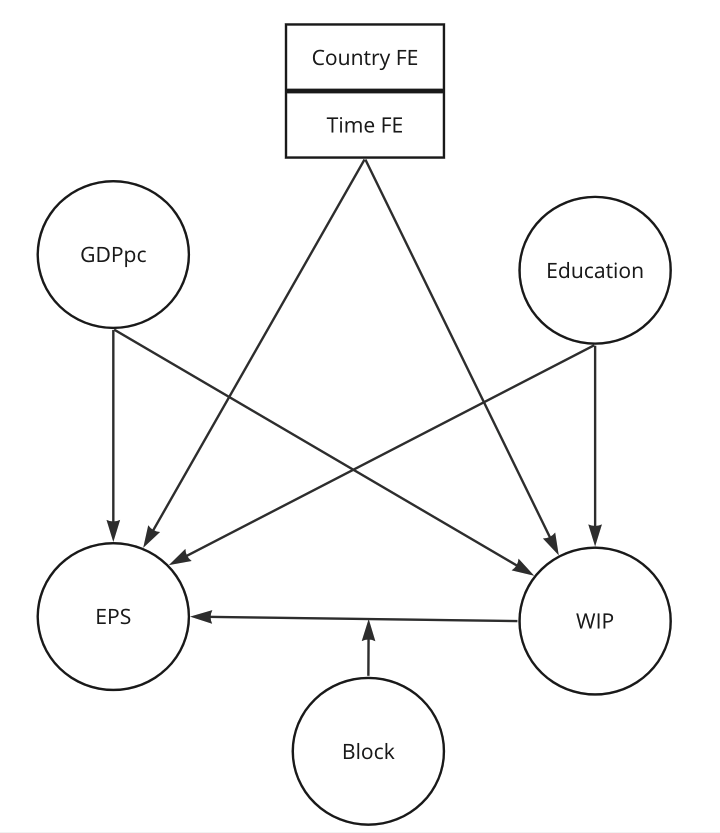

#Results
##Panel Methods Estimation

###Figure 2

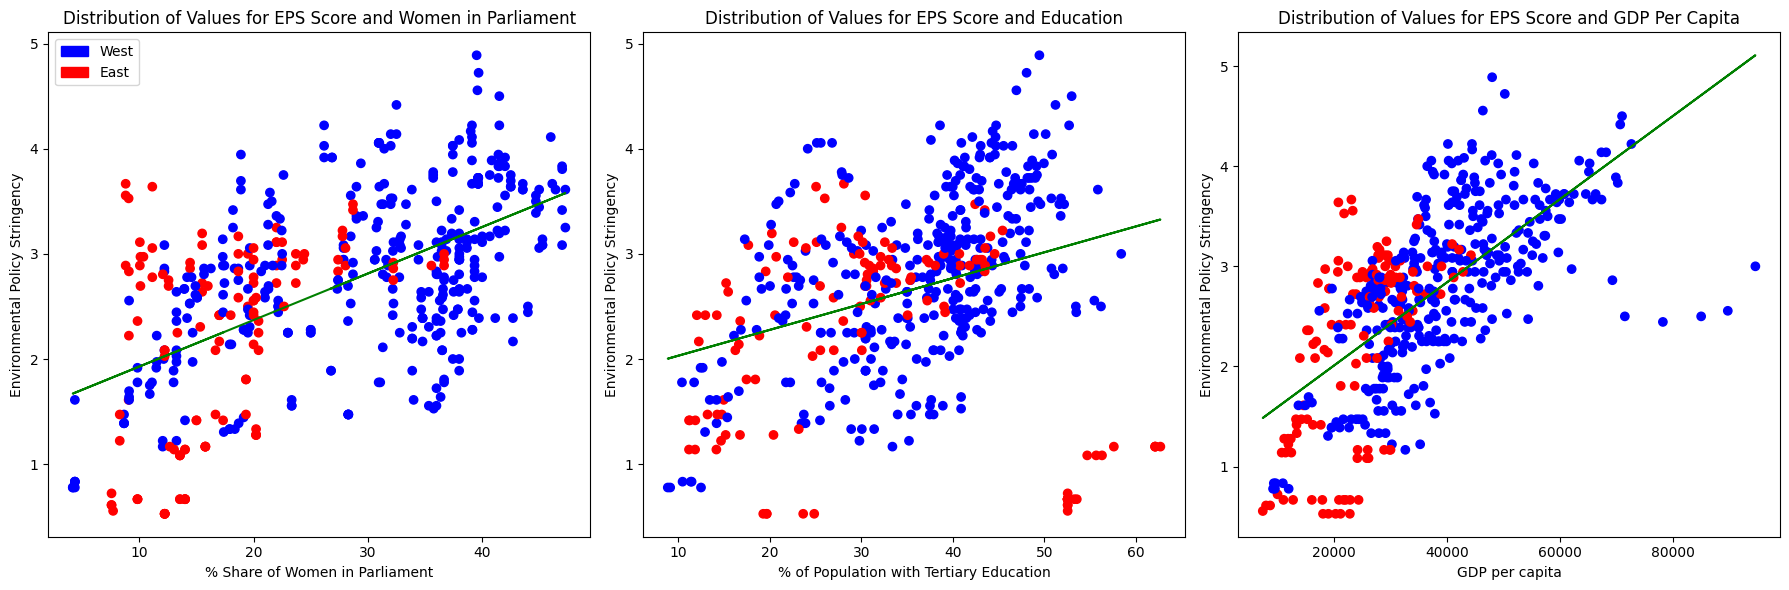

In [ ]:
"""Scatter Plot to Identify Outliers"""
color_map = {0: 'blue', 1: 'red'}
colors = df['Block'].apply(lambda x: color_map.get(x, 'black'))  # 'black' for any unexpected value

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize as needed

# Create legend handles
west_patch = mpatches.Patch(color='blue', label='West')
east_patch = mpatches.Patch(color='red', label='East')

# Define the subplots
for i, (col, title) in enumerate(zip(['WIP', 'Education', 'GDPpc'],
                                     ['% Share of Women in Parliament',
                                      '% of Population with Tertiary Education',
                                      'GDP per capita'])):
    slope, intercept = np.polyfit(df[col], df['EPS'], 1)
    axes[i].scatter(df[col], df['EPS'], c=colors, marker='o')
    y_fit = slope * np.array(df[col]) + intercept
    axes[i].plot(df[col], y_fit, color='green')
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Environmental Policy Stringency')

# Set the titles
titles = ["Distribution of Values for EPS Score and Women in Parliament",
          "Distribution of Values for EPS Score and Education",
          "Distribution of Values for EPS Score and GDP Per Capita"]
for ax, title in zip(axes, titles):
    ax.set_title(title)

# Add the legend to the first subplot
axes[0].legend(handles=[west_patch, east_patch], loc="upper left")

# Adjust layout
plt.tight_layout()

# Save the combined plot
path = "/OUT_plots/Scatter_EPS_Combined.pdf"
plt.savefig(directory + path)

# Show the plot
plt.show()

**H1: A higher representation of women in national parliaments leads to a higher EPS score**

Estimating the model stated in Equation 1 above, we find a statistically significant increase of 0.0222 points (95% CI: [0.015, 0.030] ; p-value = 0.000) in the EPS score on average following a one percentage point increase in the share of women in parliament (*Figure 2*, left). A positive relationship is also found for the EPS score and education. A one percentage point increase in the share of population with tertiary education is associated with a 0.0228 point (95% CI: [0.014, 0.032] ; p-value = 0.000) average increase in the EPS score (*Figure 2*, middle). The relationship between the EPS score and GDP per capita is positive but not statistically significant (p-value = 0.6) and with 2.028e-06 negligibly small (*Figure 2*, right).

The findings suggest that a country's environmental policies depend on the amount of women in its national parliament and on the share of its population that is highly educated. Both are traditional characteristics of developed European countries like Sweden, Norway, Belgium and others. Which align with contemporary argumentation at the COP28 underlining that the environment is a topic that mainly developed countries are able to tackle. *Which aligns with developed countries' tendency of making ambitious pledges*. We therefore

**H2: The effect of Women in Parliament is weaker for countries that were part of the Eastern Block during the Cold War**

To account for the influence of former block membership on the relationship between our dependent and independent variable, we estimated a second model with an interaction term between the women in parliament and the block variable.

*Equation 2:*

$EPS_{it} = β_0 + β_1 * WIP_{it} + β_2 * Block_{i} + β_3 * (WIP*Block)_{it} + β_4 * GDPpc_{it} + β_5 * Education_{it} + FE_i + FE_t + ϵ_{it}$

We estimated the second model with and without fixed effects. In an interaction term setting, the coefficient for women in parliament is to be interpreted as the effect of $WIP$ on $EPS$ for Western countries ($Block = 0$). The coefficient is positive and statistically significant at the common 5% level in both model specifications. The block variable is to be interpreted as the difference in intercepts between Western and Eastern countries. It is negative in the model without fixed effects and positive in the model with fixed effects. In neither of the two specifications is the respective coefficient statistically significant. Mixed results are also found for the interaction term. It is to be interpreted as the difference in slopes for Western and Eastern countries. Unlike the block variable, the interaction term is positive in the model without and negative in the model with fixed effects. In neither of the specifications is the effect significant.

The change of signs of the block variable and the interaction term between our two specifications make an identificaiton of the direction of a possible effect impossible. Additionally, the coefficients lack statistical significance in both specifications. This leads us to conclude that there is no evidence in our data that the effect of the share of women in parliament on a country's EPS score depends on the country's political history, i.e. its system and world view during the Cold War.

##Difference in Differences Estimation

By including entity and time fixed effects into our model, we can control for unobserved, time-invariant country characteristics and common time effects. However, there might still be unobserved, time-varying confounders that are not common to all countries. An example could be a change in the public environmental awareness of a country. One could envision a scandal that involves large-scale air pollution caused by a company whose all-male leadership team is also investigated due to claims of sexual harrassment of their all-female assistants. Such a scandal could clearly impact a country's public awareness of environmental and gender-related issues. Which in turn could impact both, the country's EPS score (public pressure) and the share of women in its parliament (female empowerment). Even if this might sound made up out of thin air, fixed effect models could not account for such a change in awareness. But there is a remedy to this problem, and it is called Difference in Differences (DiD).

The DiD's configuration allows it to address the above-mentioned problematic by focusing on changes over time within and between a treated (subject to intervention) and a control unit (not subject to intervention). It is designed to estimate causal effects, which could help confirm and refine the results obtained with panel methods above. The prerequesite for a DiD estimation is a clear intervention that occurs at a specific point in time and does not affect all sample units uniformly. To isolate causality, it is important that only the treated unit is subject to the intervention, i.e. that there are no spillovers to the units in the control group. Additionally, the parallel trends assumption must hold. It posits that in the absence of the intervention, the treated and control units would have evolved in parallel paths over time. This is achieved by limiting the choice of control units to entities that are similar to the treatment unit. DiD is well-suited if the intervention resembles a natural experiment, where the treatment assignment is quasi-random or exogenously determined. Accordingly, interventions can constitute legislative changes (implementation of a new law), economic interventions (change in the interest rate), or natural events (earthquakes or volcanic eruptions).

###Figure 3

<ipython-input-9-9a1a80bc796b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_did['Year'] = pd.to_numeric(df_did['Year'])
<ipython-input-9-9a1a80bc796b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_did['post'] = np.where(df_did['Year'] >= 2010, 1, 0)
<ipython-input-9-9a1a80bc796b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

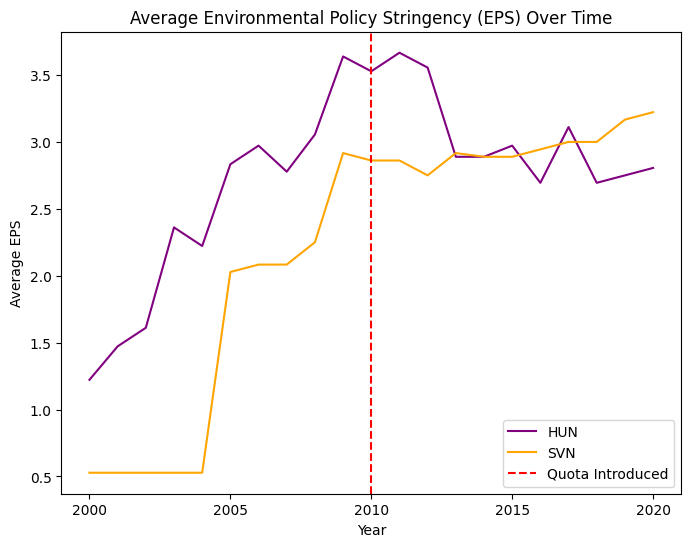

In [ ]:
#Regression
control_country = 'HUN'
df['treatment'] = np.where(df['CC'] == 'SVN', 1,
                           np.where(df['CC'] == control_country, 0, np.nan))

df_did = df.dropna(subset=['treatment'])
df_did['Year'] = pd.to_numeric(df_did['Year'])
df_did['post'] = np.where(df_did['Year'] >= 2010, 1, 0)
df_did['treatment_x_post'] = df_did['treatment'] * df_did['post']
did_model = smf.ols(formula='EPS ~ treatment + post + treatment_x_post + GDPpc + Education',
                    data=df_did).fit()

#Plot
palette = {"SVN": "orange", "HUN": "purple"}
plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='EPS', hue='CC', data=df_did, estimator=np.mean, palette=palette)
plt.title('Average Environmental Policy Stringency (EPS) Over Time')
plt.ylabel('Average EPS')
plt.xlabel('Year')
plt.axvline(x=2010, color='red', linestyle='--')
plt.xticks(ticks=range(2000, 2021, 5))
handles, labels = plt.gca().get_legend_handles_labels()
quota_line = mlines.Line2D([], [], color='red', linestyle='--', label='Quota Introduced')
handles.append(quota_line)
labels.append('Quota Introduced')
plt.legend(handles=handles, labels=labels, title='', loc='lower right')
plt.show()

In our DiD model, we exploit the introduction of gender quotas in Solvenia's national parliament in the 2010 elections. The DiD model will compare the EPS scores of Slovenia and the chosen control group before and after the former's introduction of gender quotas. If **H1** holds, we should find a positive and significant effect of the gender quota on Slovenia's EPS score. It is important to remember that the control unit cannot have gender quotas implemented in the observed time interval.

If our assumption of differentiated development of EPS scores and shares of women in parliaments for Western and Eastern countries holds, the chosen control unit must be of the former Eastern block as well. *Figure 3* shows the results of a DiD model where Slovenia is the treatment unit and Hungary is the control unit. Hungary fulfils the above-mentioned similarity requirement due to its geographic proximity to Slovenia and their joint cultural and historical heritage (Kingdom Austria-Hungary and Soviet Union).

We find a positive but not statistically significant effect of 0.4355 (95% CI: [-0.243,1.114] ; p-value = 0.201) of the implementation of gender quotas in Slovenia on its respective EPS score. The direction of the effect is in line with **H1** but does not let us conclude on a causal relationship.

Statistically, the parallel trends assumption can be checked by ensuring that the interaction term between the treatment (Slovenia) and the time period (Year) is not significant in the pre-intervention period (before 2010).
This suggests that the rate of change over time in the outcome variable is not significantly different between the two groups before the intervention. In our case, the interaction term has a p-value of 0.459 and is therefore not statistically significant. Accordingly, the parallel trends assumption holds.

When looking at the trajectory of Hungary's EPS score in *Figure 3*, one can observe a clear drop in the score in around 2011 and no clear development trend after that. From visual inspection, it seems that Hungary's EPS score embarks on a decreasing path after 2011. This development in the control variable is problematic. Our results could consequentially be driven not by an absence of an effect of $WIP$ on $EPS$ for Slovenia but a perturbation or concealment of this effect by our choice of the control.

To investigate this possibility, we estimate a second model in which we include three former Eastern Block members into the control group instead of relying on one control unit. The control group is comprised of an equally weighted average of the Czech Republic, Poland, and Hungary. This allows to smooth out the trajectory of the old control unit, lowering country-specific variations like the drop in Hungary's EPS score. The motivation for choosing Hungary in the first DiD specification holds also for Poland and the Czech Republic. Additionally, the parallel trends assumption holds at a 90% confidence level for each of the individual countries.

In our new model, we appropriately adjust the standard errors to account for the fact that the control group is now an aggregate of several units. We achieve this by conducting a regression with clustered standard errors.

###Figure 4

<ipython-input-10-32ff616ab824>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_avg = control_df.groupby('Year').mean().reset_index()
<ipython-input-10-32ff616ab824>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(control_avg, ignore_index=True)
<ipython-input-10-32ff616ab824>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_did['Year'] = pd.to_numeric(df_did['Year'])
<ipython-input-10-32ff616ab824>:12: SettingWithCopyWarning: 
A value is tr

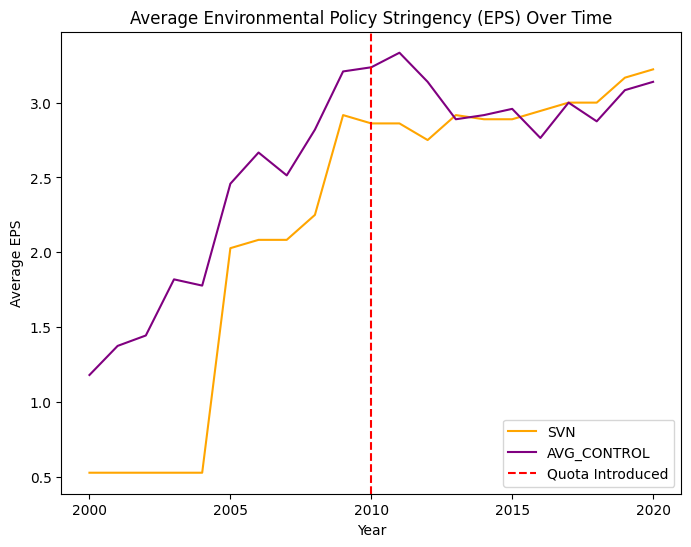

In [ ]:
#Regression
control_countries = ['CZR', 'POL', 'HUN']
control_df = df[df['CC'].isin(control_countries)]
control_avg = control_df.groupby('Year').mean().reset_index()
control_avg['CC'] = 'AVG_CONTROL'
df = df.append(control_avg, ignore_index=True)
df['treatment'] = np.where(df['CC'] == 'SVN', 1,
                           np.where(df['CC'] == 'AVG_CONTROL', 0, np.nan))
df_did = df.dropna(subset=['treatment'])
df_did['Year'] = pd.to_numeric(df_did['Year'])
df_did['post'] = np.where(df_did['Year'] >= 2010, 1, 0)
df_did['treatment_x_post'] = df_did['treatment'] * df_did['post']
did_model = smf.ols(formula='EPS ~ treatment + post + treatment_x_post + GDPpc + Education',
                    data=df_did, cov_type='cluster').fit()

#Plot
palette = {"SVN": "orange", "AVG_CONTROL": "purple"}
plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='EPS', hue='CC', data=df_did, estimator=np.mean, palette=palette)
plt.title('Average Environmental Policy Stringency (EPS) Over Time')
plt.ylabel('Average EPS')
plt.xlabel('Year')
plt.axvline(x=2010, color='red', linestyle='--')
plt.xticks(ticks=range(2000, 2021, 5))
handles, labels = plt.gca().get_legend_handles_labels()
quota_line = mlines.Line2D([], [], color='red', linestyle='--', label='Quota Introduced')
handles.append(quota_line)
labels.append('Quota Introduced')
plt.legend(handles=handles, labels=labels, title='', loc='lower right')
plt.show()

When estimating the model with the control group, we find a statistically significant average increase of Slovenia's EPS score of 0.6197 (95% CI: [0.091, 1.148] ; p-value = 0.023) points after the implementation of gender quotas in its national parliament. The result is in line with **H1**, according to which an increase in the share of women in a country's parliament leads to a higher EPS score. Additionally, the parallel trend assumption holds (p-value of interaction term = 0.202).

DISCUSS :))
It must thereby be discussed why Slovenia's EPS score is ceasing its steeply increasing trajectory around 2010. One possible explanation could be that Slovenia implemented policies that led the OECD to stop awarding it an increasing EPS score. Another possibility is that the methodology of the EPS audit changed, which in turn led to a different output at unchanged input.

*1 option could be that expenses for technological development decreased on OECD average around 2010, that trend could have been transmitted to SVN see Miro*

#Discussion & Conclusion
Here we discuss what it means, what might be driving our results, what we could have done differently, and where future research could do better/different than us.

*Proposal for Conclusion Start: Summary of all findings*

We looked at how the share of women in a country's parliament might affect the stringency of the same country's environmental policies. We find positive and statistically significant effects in both, the fixed effects and the DiD models. Accordingly, the amount of women in national parliaments seem to have an influence on a country's EPS score. We also tested to what extent this relationship is driven by a country's political and historical past. Evaluating an interaction term model, we fail to identify a clear effect of former block membership on the relationship between the share of women in parliament and a country's EPS score. Education is found to be an important driver of environmental policies too. The variable is found to be positive and significant in both model specifications with fixed effects. Interestingly, the role of GDP per capita seems negligible. As soon as fixed effects are included into our models, the effect of GDP per capita loses its statistical significance.  

The results of the final test confirm our starting assumption that women in parliaments positively influence their country's environmental stringency.
However some questions are left.
seeing that gender and climate action (at legislative) are linked in a positive ways, it means:

- that backtracking in gender equality on the political scene (which could happen if traditionalist regimes are implemented in Europe) will have a negative impact on climate action and that will decrease the wellbeing of the entire population.
-

- Education plays an important role in determining the environmental legislation and the women's integration in politics.
- Our assumptions might be too simplistic and we only accounted for 2 controls, we might have missed sth
>- We did not account for membership to EU which is an important driver of gender integration and environmentally oriented legislatives,
>- other to find
- EPS evaluates laws, not the concrete actions taken to diminish a country footprint which means there is still a gap where resolutions might be taken but not accomplished.



#References
Zotero input in consistent way! APA 7th or ACA?